# Feature Selection and data preprocessing

   Y  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0  0                  110                  189                   9   
1  0                   86                  187                   9   
2  0                  225                  244                   9   
3  0                   47                  232                   9   
4  0                   97                  186                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    1.000000  0.666667   
1                   0.0                   0.0    1.111111  0.720082   
2                   0.0                   0.0    3.388889  2.195113   
3                   0.0                   0.0    1.277778  1.254621   
4                   0.0                   0.0    1.166667  0.691215   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    1.222222  1.186342       12.925926    10.888889      9.222222   
1    1.44444

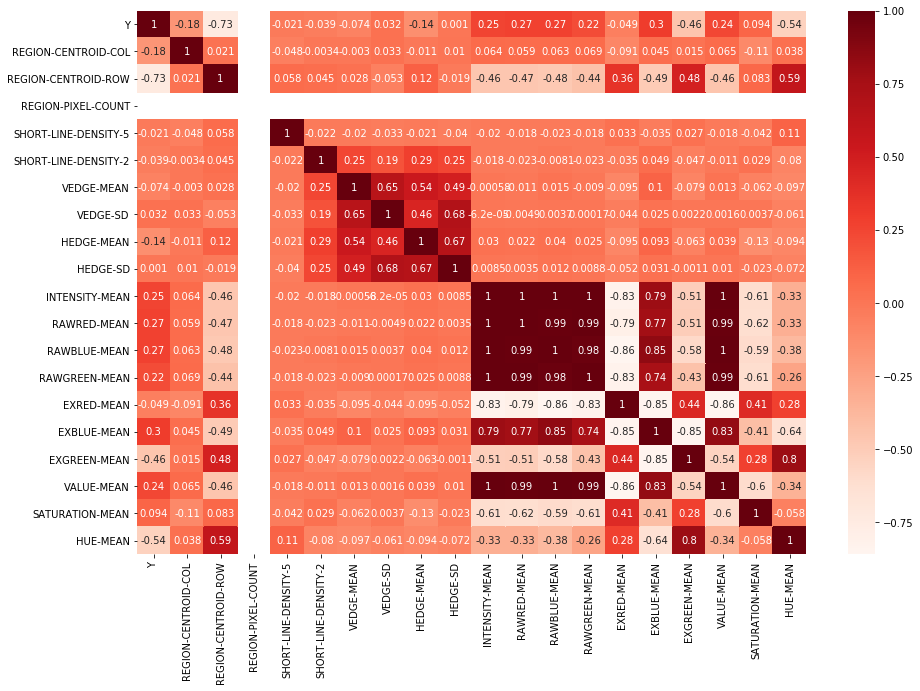

######Y###### 0       0
1       0
2       0
3       0
4       0
       ..
2095    3
2096    3
2097    3
2098    3
2099    3
Name: Y, Length: 2100, dtype: int32


In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

data_train = pd.read_csv('Train_Data.csv')

data_train['Y'],_ = pd.factorize(data_train['Y'])

print(data_train.head())
data_train.info()
plt.figure(figsize=(15,10))
cor=data_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

print("######Y######",data_train['Y'])

In [2]:
cor_target=abs(cor['Y'])
relevant_features=cor_target[cor_target>0.25]
relevant_features=relevant_features[relevant_features<1.0]
print(relevant_features)

REGION-CENTROID-ROW    0.732779
INTENSITY-MEAN         0.252620
RAWRED-MEAN            0.269834
RAWBLUE-MEAN           0.266674
EXBLUE-MEAN            0.300594
EXGREEN-MEAN           0.459630
HUE-MEAN               0.535901
Name: Y, dtype: float64


In [3]:
print(data_train[["REGION-CENTROID-ROW","INTENSITY-MEAN"]].corr())
print(data_train[["REGION-CENTROID-ROW","RAWRED-MEAN"]].corr())
print(data_train[["REGION-CENTROID-ROW","RAWBLUE-MEAN"]].corr())
print(data_train[["REGION-CENTROID-ROW","EXBLUE-MEAN"]].corr())
print(data_train[["REGION-CENTROID-ROW","EXGREEN-MEAN"]].corr())
print(data_train[["REGION-CENTROID-ROW","HUE-MEAN"]].corr())


                     REGION-CENTROID-ROW  INTENSITY-MEAN
REGION-CENTROID-ROW             1.000000       -0.464687
INTENSITY-MEAN                 -0.464687        1.000000
                     REGION-CENTROID-ROW  RAWRED-MEAN
REGION-CENTROID-ROW             1.000000    -0.467181
RAWRED-MEAN                    -0.467181     1.000000
                     REGION-CENTROID-ROW  RAWBLUE-MEAN
REGION-CENTROID-ROW             1.000000     -0.481601
RAWBLUE-MEAN                   -0.481601      1.000000
                     REGION-CENTROID-ROW  EXBLUE-MEAN
REGION-CENTROID-ROW             1.000000    -0.493568
EXBLUE-MEAN                    -0.493568     1.000000
                     REGION-CENTROID-ROW  EXGREEN-MEAN
REGION-CENTROID-ROW             1.000000      0.481096
EXGREEN-MEAN                    0.481096      1.000000
                     REGION-CENTROID-ROW  HUE-MEAN
REGION-CENTROID-ROW               1.0000    0.5925
HUE-MEAN                          0.5925    1.0000


In [13]:
#Preparing the data for training the model
X = pd.DataFrame(np.c_[ data_train['REGION-CENTROID-ROW'],data_train['INTENSITY-MEAN'],data_train['RAWRED-MEAN'],data_train['RAWBLUE-MEAN'],data_train['EXBLUE-MEAN'],data_train['EXGREEN-MEAN']], columns = ['REGION-CENTROID-ROW', 'INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN','EXBLUE-MEAN','EXGREEN-MEAN'])
Y= data_train['Y']

print(data_train['Y'].value_counts())
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1,stratify=Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print(Y_train.value_counts(normalize=True)*100)
print("\n\n")
print(Y_test.value_counts(normalize=True)*100)

# print("\n\n")
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=1, stratify=y)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

# print(Y_train.value_counts(normalize=True)*100)
# print("\n\n")
# print(Y_test.value_counts(normalize=True)*100)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train.view()
X_train

5    300
3    300
1    300
6    300
4    300
2    300
0    300
Name: Y, dtype: int64
(1680, 6)
(420, 6)
(1680,)
(420,)
6    14.285714
5    14.285714
4    14.285714
3    14.285714
2    14.285714
1    14.285714
0    14.285714
Name: Y, dtype: float64



6    14.285714
5    14.285714
4    14.285714
3    14.285714
2    14.285714
1    14.285714
0    14.285714
Name: Y, dtype: float64


array([[-0.69773864, -0.50035509, -0.5637348 , -0.40446904,  0.22455357,
        -0.21457827],
       [-0.05445553,  0.05344042,  0.06850818,  0.07562594,  0.19073419,
        -0.41463971],
       [-1.2019335 , -0.33324485, -0.29368125, -0.27423051,  0.1174588 ,
        -0.82428921],
       ...,
       [ 1.84062173, -0.5129855 , -0.54149509, -0.61131846, -1.07185756,
         1.65266126],
       [-0.08922759, -0.97739645, -0.94498678, -1.01990994, -1.0831307 ,
         0.74762165],
       [ 1.92755188, -0.8277745 , -0.83061119, -0.92031576, -1.29168379,
         1.53834042]])

# Logistic regression

C:\Users\Madhuri\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 85.23809523809524
Precision: [1.         0.95238095 0.56       0.86538462 0.62820513 1.
 0.98275862]
Recall: [0.98333333 1.         0.46666667 0.75       0.81666667 1.
 0.95      ]
Prediction =  [4]


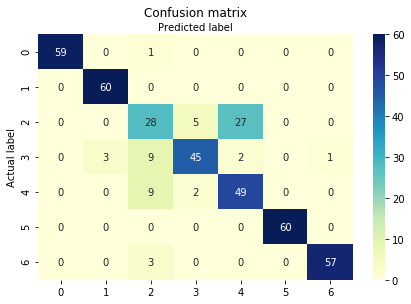

In [14]:

# import the class 
from sklearn.linear_model import LogisticRegression 
# instantiate the model (using the default parameters) 
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit the model with data 
logreg.fit(X_train,Y_train) 
# Predict output for test set 
y_pred=logreg.predict(X_test) 


# import the metrics class 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred) 
cnf_matrix 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
class_names=['BRICKFACE','FOLIAGE','SKY','CEMENT','WINDOW','PATH','GRASS'] # name of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 


print("Accuracy:",metrics.accuracy_score(Y_test, y_pred)*100)
print("Precision:",metrics.precision_score(Y_test, y_pred,average=None)) 
print("Recall:",metrics.recall_score(Y_test, y_pred,average=None)) 
# Predict output for some unknown sample of the patient  
test_X = np.array([44,12.925926,10.888889,9.222222,-11.111111,17.222221]) 
test_X_standard = scaler.transform(test_X.reshape(1, -1)) 
pred_y = logreg.predict(test_X_standard) 
print("Prediction = ", pred_y) 



# Bayes theorem

In [15]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



# Building Phase
# training the model on training set
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
# making predictions on the testing set
y_pred = gnb.predict(X_test)
data_train['Y']



# Performancec Evaluation
print("Results Using Gaussian Naive Bayes Classifier\n\n")
print("Confusion Matrix:\n ", confusion_matrix(Y_test, y_pred))
print ("Accuracy : ", accuracy_score(Y_test,y_pred)*100)
print("Report :\n ", classification_report(Y_test, y_pred))

Results Using Gaussian Naive Bayes Classifier


Confusion Matrix:
  [[59  0  1  0  0  0  0]
 [ 0 58  0  2  0  0  0]
 [ 0  0 35  3  5  0 17]
 [ 0  0  5 45  0  0 10]
 [ 0  0 32  2 19  0  7]
 [ 0  0  0  0  0 60  0]
 [ 0  0 33  3  0  0 24]]
Accuracy :  71.42857142857143
Report :
                precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       1.00      0.97      0.98        60
           2       0.33      0.58      0.42        60
           3       0.82      0.75      0.78        60
           4       0.79      0.32      0.45        60
           5       1.00      1.00      1.00        60
           6       0.41      0.40      0.41        60

    accuracy                           0.71       420
   macro avg       0.76      0.71      0.72       420
weighted avg       0.76      0.71      0.72       420



# KNN  Algorithm

Confusion Matrics:
 [[58  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0]
 [ 0  0 64  0  4  0  0]
 [ 0  2  0 46  2  0  0]
 [ 0  0 10  1 58  0  0]
 [ 0  0  0  0  0 61  0]
 [ 0  0  1  0  0  0 60]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.96      1.00      0.98        53
           2       0.85      0.94      0.90        68
           3       0.98      0.92      0.95        50
           4       0.91      0.84      0.87        69
           5       1.00      1.00      1.00        61
           6       1.00      0.98      0.99        61

    accuracy                           0.95       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.95      0.95      0.95       420



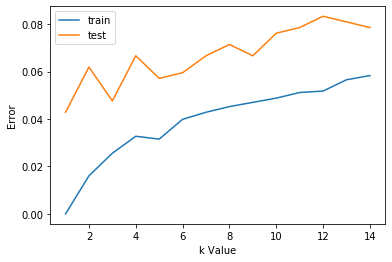

In [33]:

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Find the value for k
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred1= knn.predict(X_train)
    
    error1.append(np.mean(Y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(Y_test!= y_pred2))
    # plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

#Build the model using k-nn classifier
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train, Y_train)

# Predict for test dataset and evaluate performance
y_pred = knnModel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrics:\n",confusion_matrix(Y_test, y_pred))
print("Report:\n",classification_report(Y_test, y_pred))

# Decision Tree

In [16]:
# Implementation of decision tree classifier
# Importing the required packages
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=10, min_samples_leaf=2)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 10, min_samples_leaf = 2)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: \n",
    confusion_matrix(y_test, y_pred))
    print ("Accuracy : \n",
    accuracy_score(y_test,y_pred)*100)
    print("Report : \n",
    classification_report(y_test, y_pred))
# Driver code


def main():
    # Building Phase
    clf_gini = train_using_gini(X_train, X_test, Y_train)
    clf_entropy = train_using_entropy(X_train, X_test, Y_train)

    # Operational Phase
    print("\n\n*******Results Using Gini Index:******\n")
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(Y_test, y_pred_gini)
    
    print("\n\n*******Results Using Entropy:******\n")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(Y_test, y_pred_entropy)

# Calling main function
if __name__=="__main__":
    main()



*******Results Using Gini Index:******

Predicted values:
[2 4 1 3 5 6 2 6 0 2 1 0 5 2 4 0 6 2 3 4 1 0 1 2 2 4 2 5 3 2 4 2 4 0 0 4 6
 6 6 5 0 3 5 0 3 1 3 3 2 4 0 2 5 4 0 6 0 6 2 3 6 1 4 2 5 2 6 5 6 5 3 4 3 6
 5 0 5 0 4 0 6 6 5 1 6 1 5 2 6 5 4 2 0 1 5 6 2 3 2 4 4 5 5 0 1 6 2 6 2 5 4
 5 2 4 2 0 4 2 1 3 2 5 5 6 5 4 2 6 2 0 6 6 0 5 1 4 5 5 1 1 0 5 2 2 3 5 6 6
 5 3 4 1 1 5 6 1 6 4 5 3 3 2 0 0 4 2 2 0 1 2 1 5 4 5 0 6 2 2 1 0 2 2 2 2 2
 4 3 3 0 1 4 4 1 2 5 1 2 1 3 3 3 2 3 6 0 0 0 3 4 6 1 1 1 3 4 2 1 4 5 2 0 0
 4 5 0 0 2 5 6 2 0 1 0 5 0 6 6 6 0 4 2 0 5 3 4 2 4 3 5 2 6 6 6 2 3 4 2 5 2
 2 3 6 4 6 5 0 3 4 3 6 2 0 1 5 4 2 5 4 6 6 3 2 5 0 6 3 4 1 5 6 5 2 0 3 5 1
 6 6 6 2 1 4 3 5 4 4 1 5 5 5 3 4 2 5 6 0 2 2 1 1 5 1 2 0 5 1 4 4 3 0 5 4 5
 4 4 2 3 2 1 2 5 0 0 4 4 2 0 3 6 3 3 3 6 2 1 2 4 0 1 2 1 5 1 2 6 1 5 4 2 1
 5 1 6 0 3 1 2 3 4 2 6 3 0 4 2 1 3 4 4 4 1 2 0 1 3 3 2 6 2 1 1 4 1 6 0 0 6
 0 6 1 2 2 0 4 5 2 6 6 4 2]
Confusion Matrix: 
 [[56  0  0  2  0  0  0]
 [ 0 53  0  0  0  0  0]
 [ 0  0 60  0  8  0